In [1]:
%cd Dixon

C:\Users\Devin\Documents\GitHub\In-Rainbows\Dixon


In [4]:
import numpy as np
from numpy import inf
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import Colormap
import scipy
from scipy import io
import glob
from astropy.convolution import convolve, convolve_fft, Gaussian2DKernel
import aplpy
from astropy.wcs import WCS
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
import pyvo as vo
from urllib import urlretrieve
import copy
import re

def downloadTGSS(fitsRA, fitsDEC, framesize=.5, frame='icrs', NVSS=False, filename=None):

    """
    This is used to download a FITS image file of an extended object from TGSS or NVSS. It
    takes a .sav file and an object ID, and outputs the name of the FITS file that is downloaded.
    
    Args:
        data: A .sav file that has been run through clst.collector
        EOid (int): the 5-digit ID describing the extended object (must be from data)
        NVSS (boolean): 
            if True, downloads a FITS file of the object from NVSS
            if False, uses TGSS instead of NVSS (default is False)
            
    Returns: 
        filename: name of the FITS file which is downloaded, based on EOid, RA, and DEC.
    """
    
    from astropy.coordinates import SkyCoord
    import pyvo as vo
    from urllib import urlretrieve
    
    myLocation = SkyCoord(fitsRA*u.deg, fitsDEC*u.deg, frame = frame)

    if NVSS == False:
        query = vo.sia.SIAQuery('http://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=TGSS&',
                                pos=(myLocation.ra.deg, myLocation.dec.deg),
                                size = framesize, format='image/fits')
        if filename is None:
            filename = 'RA{}_DEC{}_TGSS.fits'.format(myLocation.ra.deg, myLocation.dec.deg)
        else:
            filename = filename
    else:
        query = vo.sia.SIAQuery('http://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=NVSS&',
                                pos=(myLocation.ra.deg, myLocation.dec.deg),
                                size = framesize, format='image/fits')
        if filename is None:
            filename = 'RA{}_DEC{}_NVSS.fits'.format(myLocation.ra.deg, myLocation.dec.deg)
        else:
            filename = filename
    print query
    results = query.execute()
    #now we extract the url of the fits file we want
    url = results[0].getdataurl()

    #and download it somewhwere. I’ve hardcoded the name, but you’ll want to have this name change
    urlretrieve(url, filename)

    fitsimage = '{}'.format(filename)
    
    fig = plt.figure(figsize=(8,8))
    fig.suptitle('')


    ax = aplpy.FITSFigure(fitsimage,figure=fig,)
    ax.show_colorscale(cmap='gray',vmin=0)   
    ax.add_colorbar()

    ax.show_scalebar(1)
    ax.scalebar.set_length(2 * u.arcminute)
    ax.scalebar.set_corner(corner='bottom right')
    ax.scalebar.set_label("2 arcminutes")
    ax.scalebar.set_color('blue')
    ax.scalebar.set_frame(True)

    ax.set_title('{}'.format(filename))
    ax.set_xaxis_coord_type('scalar')
    ax.set_yaxis_coord_type('scalar')
    ax.tick_labels.set_xformat('%11.3f')
    ax.tick_labels.set_yformat('%11.3f')


    ax = fig.gca()

    ax.patch.set_alpha(0.0)
    plt.savefig('{}.png'.format(filename))
    plt.show()

In [8]:
print SkyCoord('00 42 32.3 +40 34 19', unit=(u.hourangle, u.deg))

<SkyCoord (ICRS): (ra, dec) in deg
    ( 10.63458333,  40.57194444)>


In [8]:
downloadTGSS(10.63458333,  40.57194444, framesize=.015, filename='AND IV')

10.63458333
{u'FORMAT': u'IMAGE/FITS', u'POS': u'10.63458333,40.57194444', u'SIZE': '0.15'}


DALServiceError: ExpatError: no element found: line 39, column 0

In [11]:
%cd Dixon
Chris = np.genfromtxt('combined-radii-visually-inspected-5-23-17.txt', \
                      names=True,delimiter=',',dtype=None,unpack=True,skip_header=0)

[Error 2] The system cannot find the file specified: u'Dixon'
C:\Users\Devin\Documents\GitHub\In-Rainbows\Dixon


{u'FORMAT': u'IMAGE/FITS', u'POS': u'194.847550121,27.9195655267', u'SIZE': '0.05'}
INFO: Auto-setting vmax to  3.274e-03 [aplpy.core]


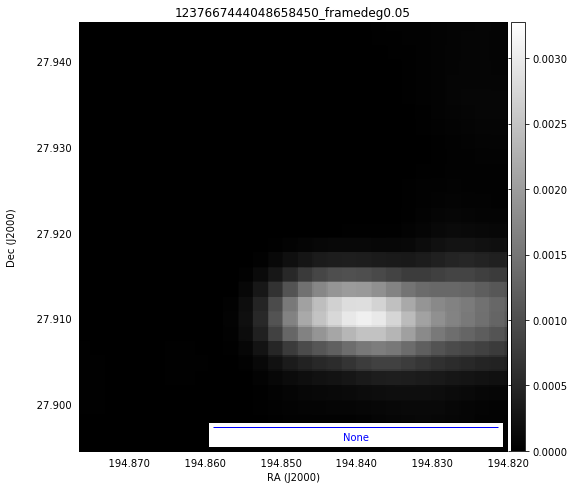

{u'FORMAT': u'IMAGE/FITS', u'POS': u'348.802605823,-1.24953224043', u'SIZE': '0.05'}
INFO: Auto-setting vmax to  8.833e-05 [aplpy.core]


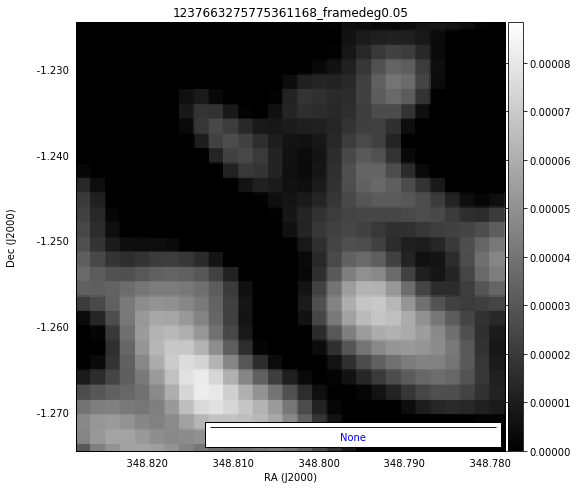

{u'FORMAT': u'IMAGE/FITS', u'POS': u'140.176908769,56.7787338102', u'SIZE': '0.05'}
INFO: Auto-setting vmax to  4.731e-05 [aplpy.core]


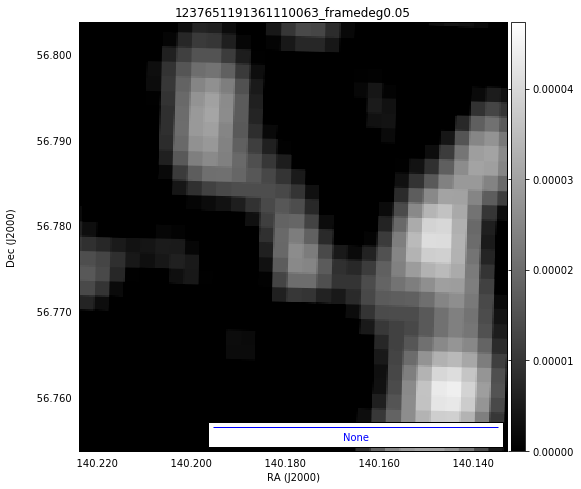

{u'FORMAT': u'IMAGE/FITS', u'POS': u'27.3102495641,13.0319847009', u'SIZE': '0.05'}
INFO: Auto-setting vmax to  3.956e-04 [aplpy.core]


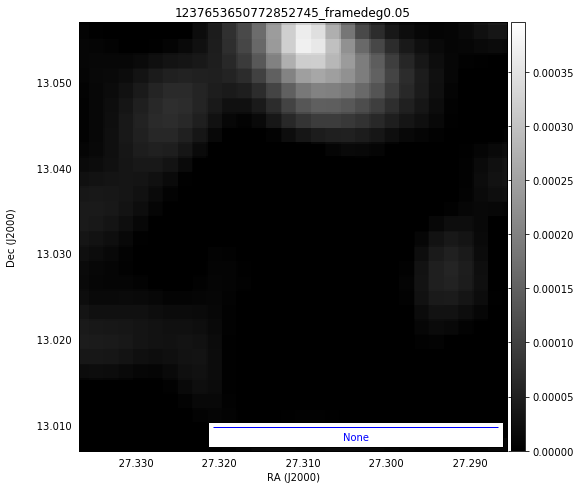

{u'FORMAT': u'IMAGE/FITS', u'POS': u'20.5376791775,-1.16524116138', u'SIZE': '0.05'}
INFO: Auto-setting vmax to  6.495e-05 [aplpy.core]


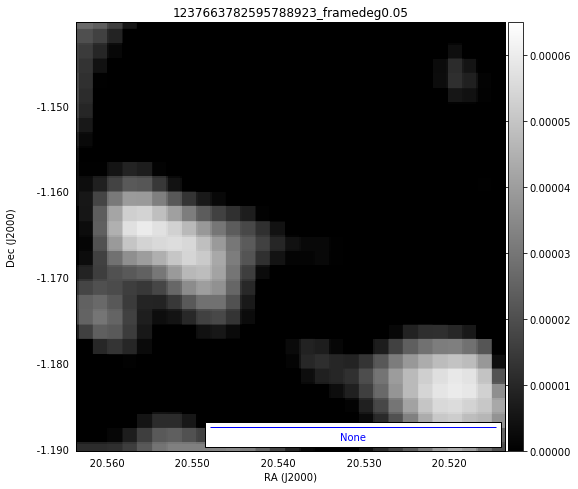

{u'FORMAT': u'IMAGE/FITS', u'POS': u'17.4491830673,1.21983527776', u'SIZE': '0.05'}
INFO: Auto-setting vmax to  4.955e-05 [aplpy.core]


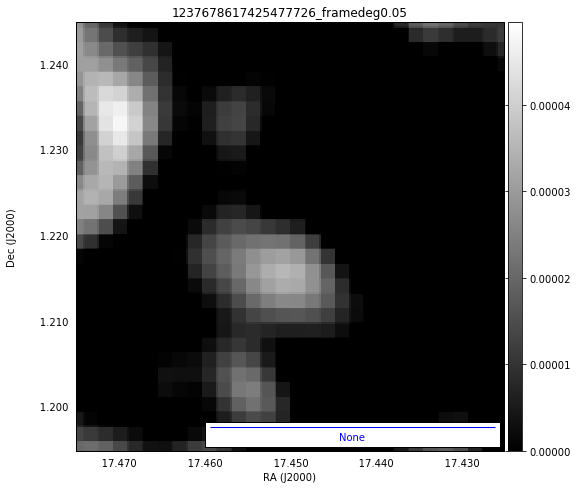

{u'FORMAT': u'IMAGE/FITS', u'POS': u'19.7054946621,-0.997192985748', u'SIZE': '0.05'}
INFO: Auto-setting vmax to  3.106e-04 [aplpy.core]


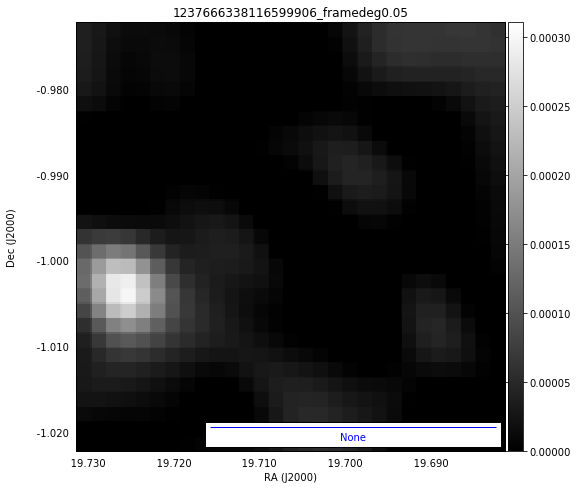

{u'FORMAT': u'IMAGE/FITS', u'POS': u'50.1402106426,-0.339228056644', u'SIZE': '0.05'}
INFO: Auto-setting vmax to  5.985e-05 [aplpy.core]


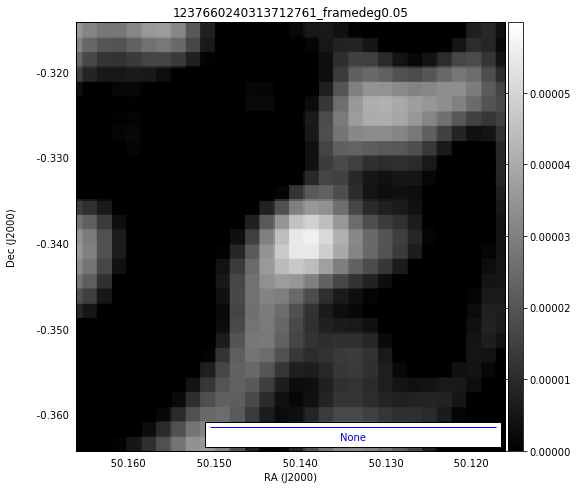

{u'FORMAT': u'IMAGE/FITS', u'POS': u'226.642818746,1.55882827335', u'SIZE': '0.05'}
INFO: Auto-setting vmax to  1.099e-04 [aplpy.core]


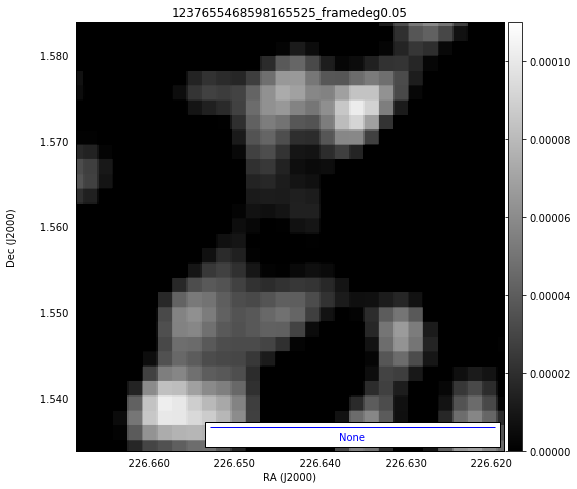

{u'FORMAT': u'IMAGE/FITS', u'POS': u'157.983257826,4.00332707518', u'SIZE': '0.05'}
INFO: Auto-setting vmax to  7.059e-05 [aplpy.core]


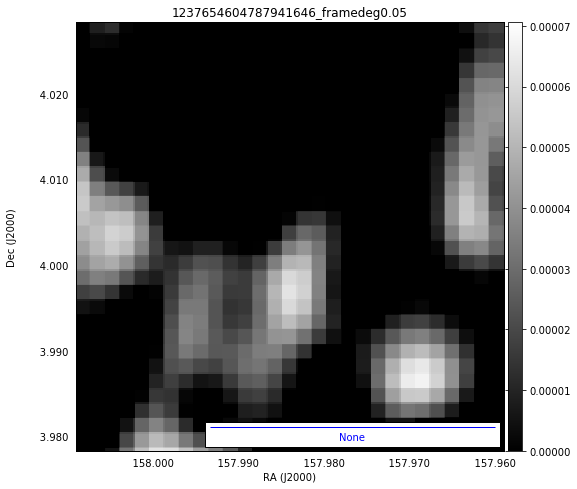

{u'FORMAT': u'IMAGE/FITS', u'POS': u'334.008460248,14.0405464621', u'SIZE': '0.05'}
INFO: Auto-setting vmax to  1.880e-04 [aplpy.core]


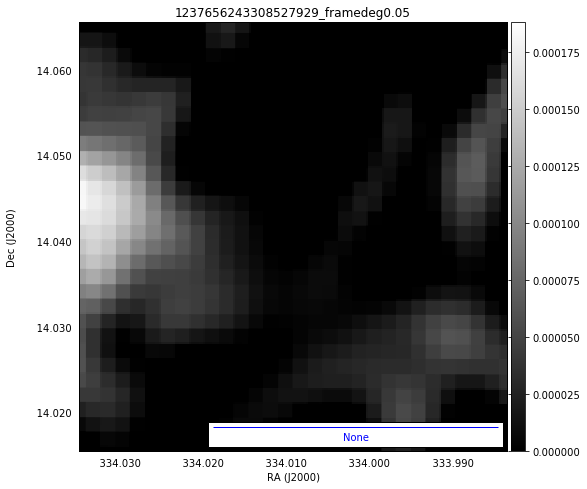

{u'FORMAT': u'IMAGE/FITS', u'POS': u'208.048153601,2.31528358925', u'SIZE': '0.05'}
INFO: Auto-setting vmax to  1.093e-04 [aplpy.core]


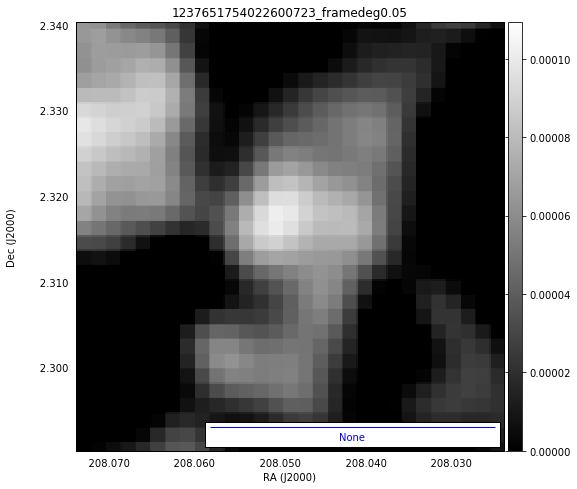

{u'FORMAT': u'IMAGE/FITS', u'POS': u'32.1609604282,0.128342680825', u'SIZE': '0.05'}
INFO: Auto-setting vmax to  6.443e-05 [aplpy.core]


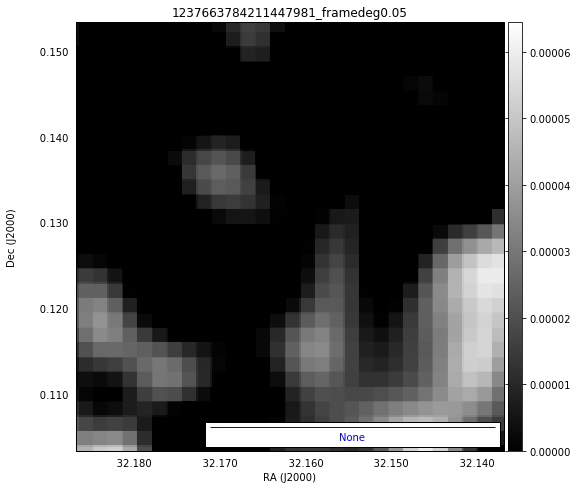

{u'FORMAT': u'IMAGE/FITS', u'POS': u'318.447274013,10.8273007441', u'SIZE': '0.05'}
INFO: Auto-setting vmax to  1.337e-04 [aplpy.core]


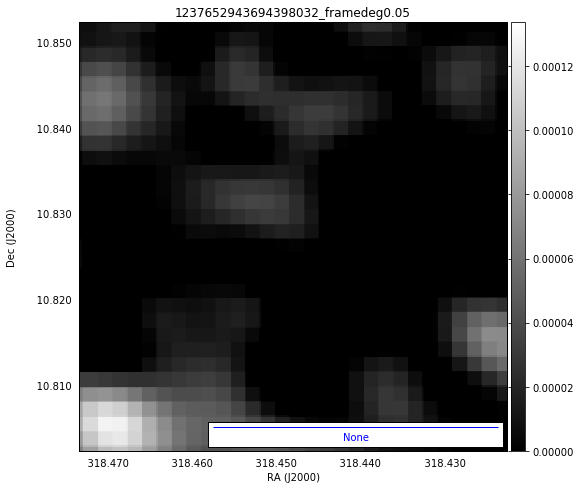

{u'FORMAT': u'IMAGE/FITS', u'POS': u'231.677446029,-1.04218344483', u'SIZE': '0.05'}
INFO: Auto-setting vmax to  1.191e-04 [aplpy.core]


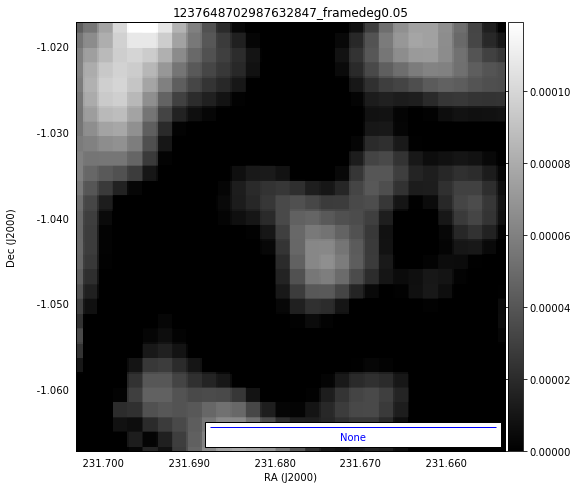

{u'FORMAT': u'IMAGE/FITS', u'POS': u'204.379373422,60.0264114776', u'SIZE': '0.05'}
INFO: Auto-setting vmax to  5.407e-05 [aplpy.core]


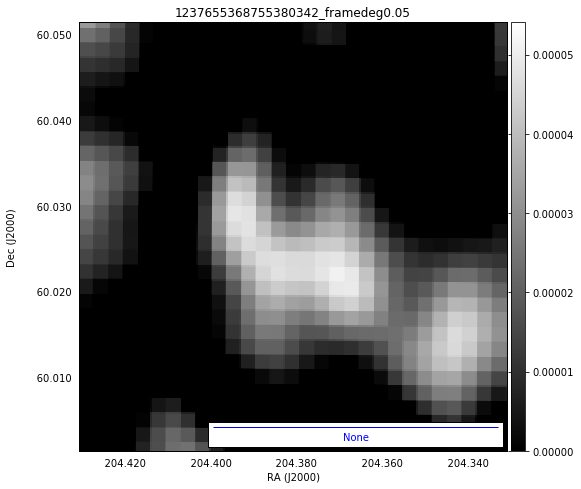

{u'FORMAT': u'IMAGE/FITS', u'POS': u'197.765496241,54.2782508664', u'SIZE': '0.05'}
INFO: Auto-setting vmax to  5.668e-05 [aplpy.core]


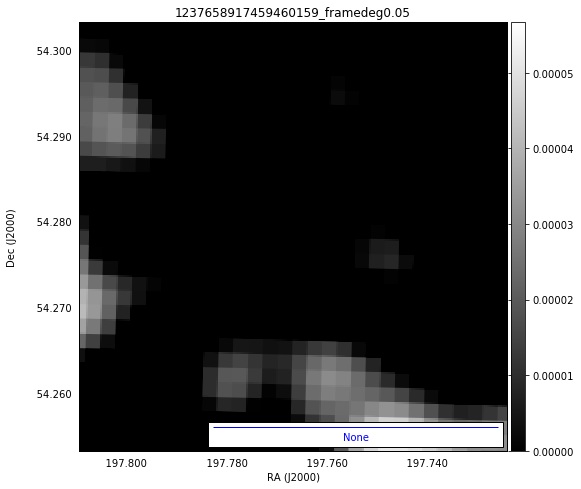

{u'FORMAT': u'IMAGE/FITS', u'POS': u'224.627140434,48.4856372056', u'SIZE': '0.05'}


In [ ]:
for i in range(len(Chris['objid'])):
    downloadTGSS(Chris['ra'][i],  Chris['dec'][i], framesize=.05, filename='{}_framedeg{}'.format(Chris['objid'][i],.05))

In [12]:
print np.where(Chris['objid']==1237667444048658450)

(array([ 0, 24, 47, 59], dtype=int64),)


In [9]:
print Chris['ra'][0]

194.847550121


{u'FORMAT': u'IMAGE/FITS', u'POS': u'194.847550121,27.9195655267', u'SIZE': '0.02'}
INFO: Auto-setting vmax to  5.404e-04 [aplpy.core]


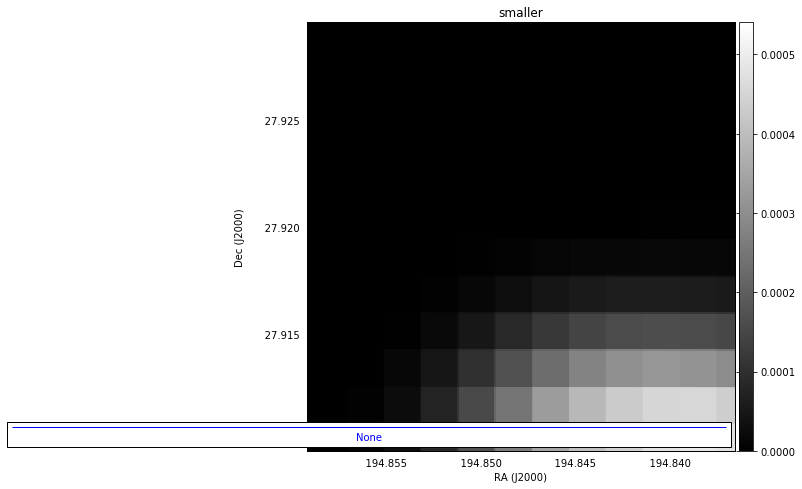

In [11]:
downloadTGSS(Chris['ra'][0],  Chris['dec'][0], framesize=.02, filename='smaller')

In [6]:
services = vo.regsearch(servicetype='sia', waveband='radio')
for service in services:
    print(service.res_title)

Sydney University Molonglo Sky Survey
The HI 4-PI Survey
CSIRO ASKAP Science Data Archive Image Access Service
Effelsberg-Bonn HI Survey
VLA-A Array AL218 Texas Survey Source Snapshots (AL218)
VLBI images of Lockman Hole radio sources
LABOCA Extended Chandra Deep Field South Submillimetre Survey
VLA Faint Images of the Radio Sky at Twenty Centimeters (FIRST)
Dickey and Lockman HI map
Bonn 1420 MHz Survey
CO Galactic Plane Survey
GTEE 0035 MHz Radio survey
VLA Survey of SDSS Stripe 82
4850 MHz Survey - GB6/PMN
Westerbork Northern Sky Survey
GOODS North Observations with the VLA
GMRT 150 MHz All-sky Radio Survey: First Alternative Data Release
VLA Low-frequency Sky Survey
HI All-Sky Continuum Survey
NRA) VLA Sky Survey
Cosmic Evolution Survey with HST
FIRST


In [9]:
for service in services:
    print service.res_title, service.access_url


Sydney University Molonglo Sky Survey https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=sumss&
The HI 4-PI Survey https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=hi4pi&
CSIRO ASKAP Science Data Archive Image Access Service https://casda.csiro.au/casda_vo_tools/sia2/query?
Effelsberg-Bonn HI Survey https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=ebhis&
VLA-A Array AL218 Texas Survey Source Snapshots (AL218) http://archive.stsci.edu/siap/search.php?id=al218&
VLBI images of Lockman Hole radio sources http://dc.zah.uni-heidelberg.de/emi/q/s/siap.xml?
LABOCA Extended Chandra Deep Field South Submillimetre Survey https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=cdfs-less&
VLA Faint Images of the Radio Sky at Twenty Centimeters (FIRST) http://archive.stsci.edu/siap/search.php?id=vla-first&
Dickey and Lockman HI map https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=nh&
Bonn 1420 MHz Survey https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=1420mhz&
CO Galactic

In [21]:
cats = vo.regsearch(servicetype='sia', waveband='radio')
for cat in cats:
    print cat.res_title, cat.access_url

Sydney University Molonglo Sky Survey https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=sumss&
The HI 4-PI Survey https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=hi4pi&
CSIRO ASKAP Science Data Archive Image Access Service https://casda.csiro.au/casda_vo_tools/sia2/query?
Effelsberg-Bonn HI Survey https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=ebhis&
VLA-A Array AL218 Texas Survey Source Snapshots (AL218) http://archive.stsci.edu/siap/search.php?id=al218&
VLBI images of Lockman Hole radio sources http://dc.zah.uni-heidelberg.de/emi/q/s/siap.xml?
LABOCA Extended Chandra Deep Field South Submillimetre Survey https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=cdfs-less&
VLA Faint Images of the Radio Sky at Twenty Centimeters (FIRST) http://archive.stsci.edu/siap/search.php?id=vla-first&
Dickey and Lockman HI map https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=nh&
Bonn 1420 MHz Survey https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=1420mhz&
CO Galactic

In [42]:
print cats[1].access_url

https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=hi4pi&


In [43]:
def showVLA(fitsRA, fitsDEC, x, framesize=.5, frame='icrs', NVSS=False, filename=None):

    """
    This is used to download a FITS image file of an extended object from TGSS or NVSS. It
    takes a .sav file and an object ID, and outputs the name of the FITS file that is downloaded.
    
    Args:
        data: A .sav file that has been run through clst.collector
        EOid (int): the 5-digit ID describing the extended object (must be from data)
        NVSS (boolean): 
            if True, downloads a FITS file of the object from NVSS
            if False, uses TGSS instead of NVSS (default is False)
            
    Returns: 
        filename: name of the FITS file which is downloaded, based on EOid, RA, and DEC.
    """
    
    from astropy.coordinates import SkyCoord
    import pyvo as vo
    from urllib import urlretrieve
    
    myLocation = SkyCoord(fitsRA*u.deg, fitsDEC*u.deg, frame = frame)

    query = vo.sia.SIAQuery(cats[x].access_url,
                            pos=(myLocation.ra.deg, myLocation.dec.deg),
                            size = framesize, format='image/fits')
    if filename is None:
        filename = 'RA{}_DEC{}_VLA.fits'.format(myLocation.ra.deg, myLocation.dec.deg)
    else:
        filename = filename

    print query
    results = query.execute()
    #now we extract the url of the fits file we want
    url = results[0].getdataurl()

    #and download it somewhwere. I’ve hardcoded the name, but you’ll want to have this name change
    urlretrieve(url, filename)

    fitsimage = '{}'.format(filename)
    
    fig = plt.figure(figsize=(8,8))
    fig.suptitle('')


    ax = aplpy.FITSFigure(fitsimage,figure=fig,)
    ax.show_colorscale(cmap='gray',vmin=0)   
    ax.add_colorbar()

    ax.show_scalebar(1)
    ax.scalebar.set_length(2 * u.arcminute)
    ax.scalebar.set_corner(corner='bottom right')
    ax.scalebar.set_label("2 arcminutes")
    ax.scalebar.set_color('blue')
    ax.scalebar.set_frame(True)

    ax.set_title('{}'.format(filename))
    ax.set_xaxis_coord_type('scalar')
    ax.set_yaxis_coord_type('scalar')
    ax.tick_labels.set_xformat('%11.3f')
    ax.tick_labels.set_yformat('%11.3f')


    ax = fig.gca()

    ax.patch.set_alpha(0.0)
    plt.savefig('{}.png'.format(filename))
    plt.show()

In [14]:
print SkyCoord('00 47 33.134 -25 17 19.68', unit=(u.hourangle, u.deg))

<SkyCoord (ICRS): (ra, dec) in deg
    ( 11.88805833, -25.2888)>


{u'FORMAT': u'IMAGE/FITS', u'POS': u'140.176908769,56.7787338102', u'SIZE': '5.0'}
INFO: Auto-setting vmax to  2.218e+00 [aplpy.core]


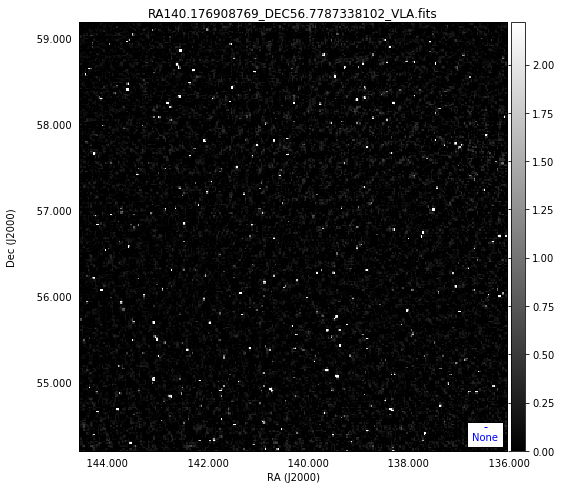

In [88]:
showVLA(Chris['ra'][2],  Chris['dec'][2], 16, framesize=5)